In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

In [2]:
url = 'D:/Digitalent/Python/Project/Nasabah_U.csv'

df = pd.read_csv(url)

df.shape

(3227, 8)

In [3]:
df.head()

,Nasabah_ID,Jenis_Kel,Tgl_lahir,Jml_Pinjaman,JW,Kolektibilitas,angsuran_ke,Unit
0,MF.000392,L,31/07/1984,20000000,24,M,16,KONVEN
1,MF.000404,P,07/06/1985,20000000,24,M,18,KONVEN
2,MF.000276,P,23/09/1986,50000000,36,M,17,KONVEN
3,MF.000356,L,31/12/1983,51000000,36,M,26,KONVEN
4,MF.000369,P,29/08/1987,51000000,36,M,23,KONVEN


In [4]:
df.info()


##Menampilkan Jika Ada data yang NaN/NULL
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227 entries, 0 to 3226
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nasabah_ID      3227 non-null   object
 1   Jenis_Kel       3219 non-null   object
 2   Tgl_lahir       3219 non-null   object
 3   Jml_Pinjaman    3227 non-null   int64 
 4   JW              3227 non-null   int64 
 5   Kolektibilitas  3227 non-null   object
 6   angsuran_ke     3227 non-null   int64 
 7   Unit            3227 non-null   object
dtypes: int64(3), object(5)
memory usage: 201.8+ KB


Nasabah_ID        0
Jenis_Kel         8
Tgl_lahir         8
Jml_Pinjaman      0
JW                0
Kolektibilitas    0
angsuran_ke       0
Unit              0
dtype: int64

## Data Cleaning

In [5]:
nan_colm  = df[df['Jenis_Kel'].isnull()]
nan_colm

,Nasabah_ID,Jenis_Kel,Tgl_lahir,Jml_Pinjaman,JW,Kolektibilitas,angsuran_ke,Unit
1162,JBS.000444,NaN,NaN,30000000,12,L,12,SYARIAH
1562,RDS.000087,NaN,NaN,70000000,36,L,32,SYARIAH
1718,RDS.000157,NaN,NaN,10000000,24,L,24,SYARIAH
1963,RDS.000499,NaN,NaN,40000000,36,L,8,SYARIAH
2145,QXS.000038,NaN,NaN,35000000,36,L,36,SYARIAH
2159,QXS.000113,NaN,NaN,51000000,24,D,21,SYARIAH
2163,QXS.000120,NaN,NaN,20000000,24,KL,25,SYARIAH
2766,ULS.000130,NaN,NaN,45000000,36,L,23,SYARIAH


In [6]:
# Hapus Jenis Kelamin yang bernilai NaN

df = df.dropna(subset=['Jenis_Kel','Tgl_lahir'])
df 

,Nasabah_ID,Jenis_Kel,Tgl_lahir,Jml_Pinjaman,JW,Kolektibilitas,angsuran_ke,Unit
0,MF.000392,L,31/07/1984,20000000,24,M,16,KONVEN
1,MF.000404,P,07/06/1985,20000000,24,M,18,KONVEN
2,MF.000276,P,23/09/1986,50000000,36,M,17,KONVEN
3,MF.000356,L,31/12/1983,51000000,36,M,26,KONVEN
4,MF.000369,P,29/08/1987,51000000,36,M,23,KONVEN
...,...,...,...,...,...,...,...,...
3222,ULS.000520,P,23/07/1973,30000000,36,L,4,SYARIAH
3223,ULS.000534,L,20/11/1972,50000000,36,L,4,SYARIAH
3224,ULS.000536,L,07/03/1990,35000000,24,L,4,SYARIAH
3225,ULS.000537,L,26/06/1973,50000000,36,L,4,SYARIAH


In [7]:
#Konversi Tipe Data Tanggal Lahir ke String

df['Tgl_lahir']=df['Tgl_lahir'].astype(str)

In [8]:
#Mengubah Tanggal Lahir Menjadi Umur dan Tambahkan Kolom Umur

def hitung_umur(tgl_lhr):
    tgl_lhr = datetime.strptime(tgl_lhr, "%d/%m/%Y").date()
    today = date.today()
    return today.year - tgl_lhr.year - ((today.month, today.day) < (tgl_lhr.month, tgl_lhr.day))

df.insert(4, "Umur", df['Tgl_lahir'].apply(hitung_umur), True)

df.head(10)

,Nasabah_ID,Jenis_Kel,Tgl_lahir,Jml_Pinjaman,Umur,JW,Kolektibilitas,angsuran_ke,Unit
0,MF.000392,L,31/07/1984,20000000,38,24,M,16,KONVEN
1,MF.000404,P,07/06/1985,20000000,37,24,M,18,KONVEN
2,MF.000276,P,23/09/1986,50000000,36,36,M,17,KONVEN
3,MF.000356,L,31/12/1983,51000000,38,36,M,26,KONVEN
4,MF.000369,P,29/08/1987,51000000,35,36,M,23,KONVEN
5,MF.000409,L,29/05/1974,100000000,48,24,M,14,KONVEN
6,MF.000350,P,11/03/1977,64000000,45,40,PK,33,KONVEN
7,MF.000133,L,30/08/1976,26900000,46,41,L,29,KONVEN
8,MF.000354,L,12/05/1988,34300000,34,36,PK,27,KONVEN
9,MF.000260,P,06/12/1990,37000000,31,36,L,16,KONVEN


In [9]:
df = df.drop(['Nasabah_ID'], axis=1)

In [10]:
df.describe()

,Jml_Pinjaman,Umur,JW,angsuran_ke
count,3.219000e+03,3219.000000,3219.000000,3219.000000
mean,4.740642e+07,43.059335,29.747126,10.473750
std,5.566411e+07,9.369556,10.272063,7.649251
min,4.000000e+06,21.000000,5.000000,1.000000
25%,1.500000e+07,36.000000,24.000000,5.000000
50%,2.500000e+07,43.000000,24.000000,8.000000
75%,5.500000e+07,50.000000,36.000000,15.000000
max,5.640000e+08,67.000000,60.000000,52.000000


In [11]:
#Overview Data
sns.color_palette('copper_r')

[(1.0, 0.6709129411764706, 0.42726470588235294),
 (0.8816606922044046, 0.5575623529411765, 0.355078431372549),
 (0.7072662695705663, 0.4472752941176471, 0.28484313725490196),
 (0.5280275574191214, 0.33392470588235296, 0.21265686274509804),
 (0.35363313478528313, 0.2236376470588235, 0.14242156862745098),
 (0.1743944226338383, 0.1102870588235294, 0.07023529411764706)]

Text(0.5, 1.05, 'Hubungan antar Variabel')

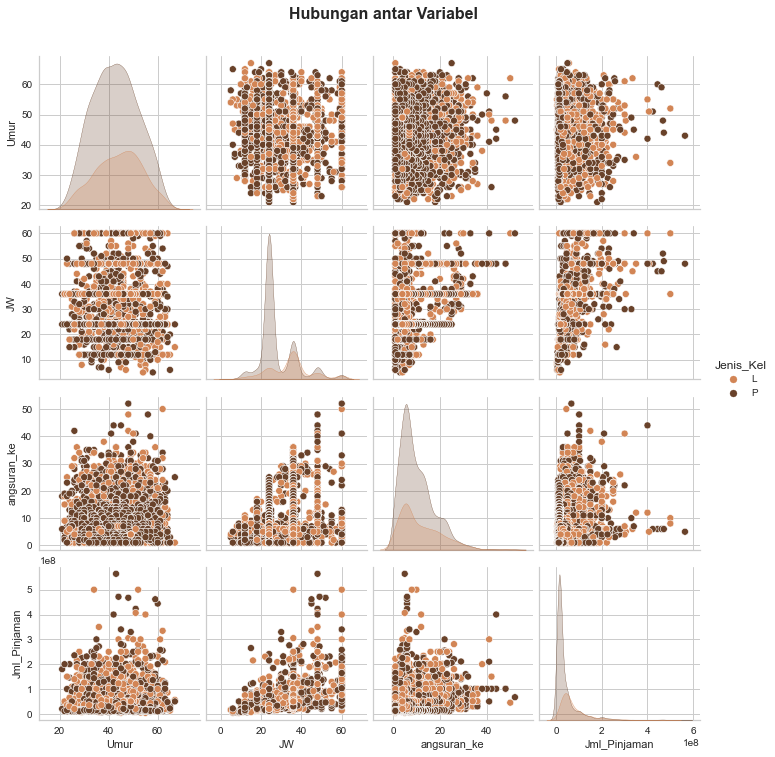

In [12]:
data = ['Umur', 'JW', 'angsuran_ke', 'Jml_Pinjaman', 'Jenis_Kel']

plot = sns.pairplot(df[data], hue='Jenis_Kel', palette='copper_r')
plot.fig.suptitle('Hubungan antar Variabel', y=1.05, weight='bold', fontsize=16)

## Data Visualization

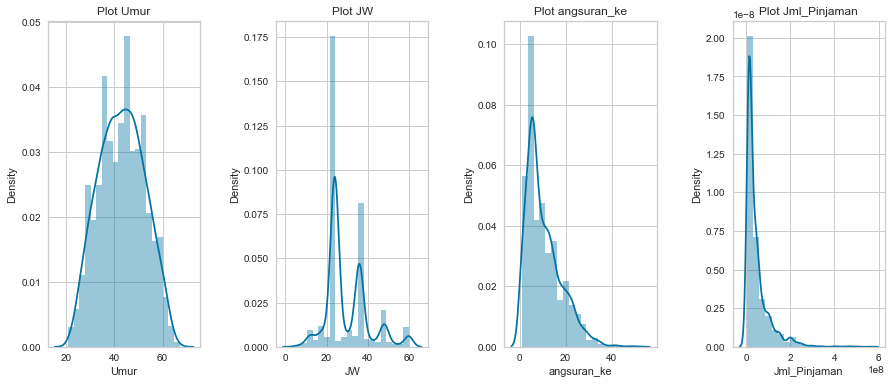

In [13]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Umur' , 'JW' , 'angsuran_ke', 'Jml_Pinjaman']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Plot {}'.format(x))
plt.show()

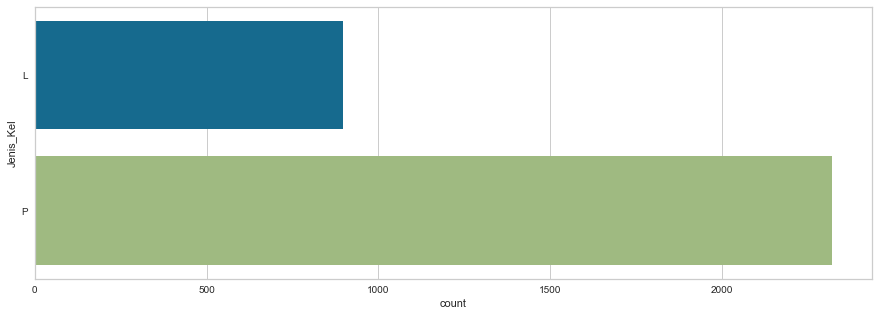

In [14]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Jenis_Kel' , data = df)
plt.show()

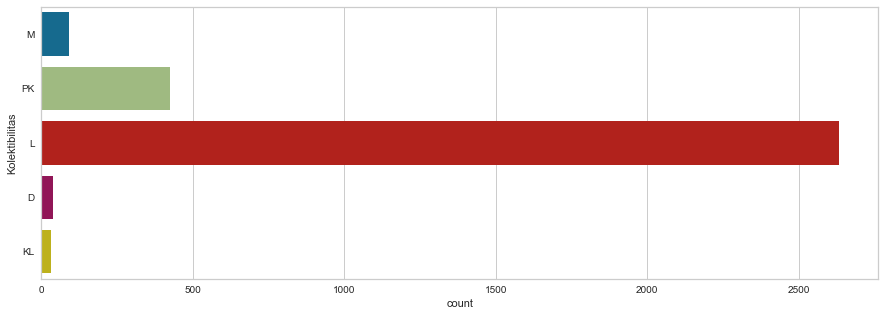

In [15]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Kolektibilitas' , data = df)
plt.show()

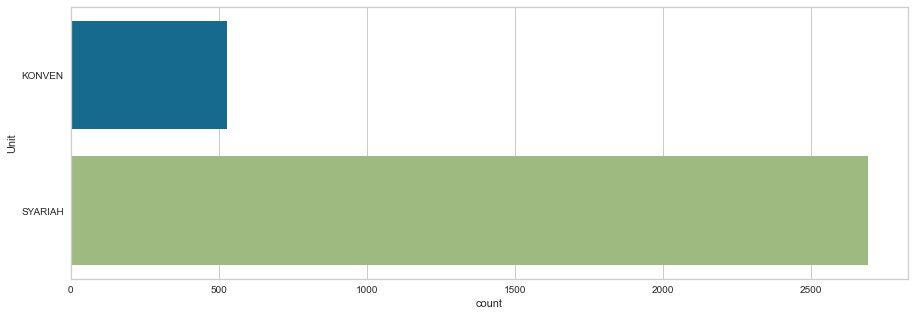

In [16]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Unit' , data = df)
plt.show()

In [17]:
group = pd.cut(df['Umur'], [10, 20, 30, 40, 50, 60, 70, 80])
group.value_counts()

(40, 50]    1139
(30, 40]    1001
(50, 60]     662
(20, 30]     331
(60, 70]      86
(10, 20]       0
(70, 80]       0
Name: Umur, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


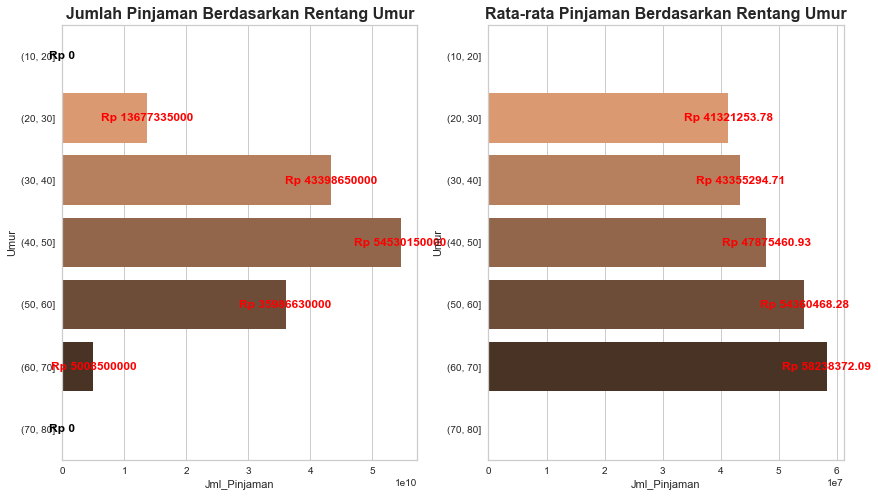

In [18]:
df2 = df.copy()
df2['Umur'] = group

sum_group = df2[['Jml_Pinjaman', 'Umur']].groupby('Umur').sum()
mean_group = df2[['Jml_Pinjaman', 'Umur']].groupby('Umur').mean()

fig, axes = plt.subplots(1,2,figsize=(14,8))
axes = axes.flatten()

sns.barplot(x=sum_group['Jml_Pinjaman'], y=sum_group.index, palette='copper_r', ci=None, orient='h', ax=axes[0])
axes[0].set_title('Jumlah Pinjaman Berdasarkan Rentang Umur', weight='bold', fontsize=16)

for i,v in enumerate(sum_group['Jml_Pinjaman']):
    if i == 0 or i ==6:
        axes[0].text(v+30000, i, 'Rp {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='black', fontsize=12)
    else:
        axes[0].text(v-40000, i, 'Rp {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='red', fontsize=12)

sns.barplot(x=mean_group['Jml_Pinjaman'], y=mean_group.index, palette='copper_r', ci=None, orient='h', ax=axes[1])
axes[1].set_title('Rata-rata Pinjaman Berdasarkan Rentang Umur', weight='bold', fontsize=16)

for i,v in enumerate(mean_group['Jml_Pinjaman']):
    axes[1].text(v-130, i, 'Rp {}'.format(round(v,2)), horizontalalignment='center', verticalalignment='center', weight='bold', color='red', fontsize=12)

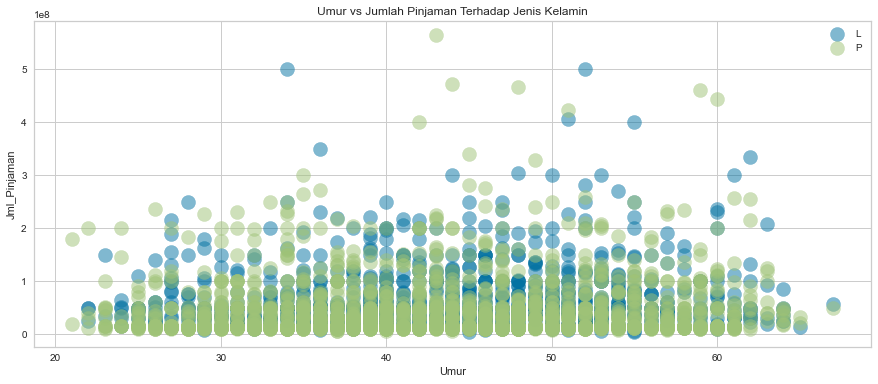

In [19]:
plt.figure(1 , figsize = (15 , 6))
for jeniskel in ['L' , 'P']:
    plt.scatter(x = 'Umur' , y = 'Jml_Pinjaman' , data = df[df['Jenis_Kel'] == jeniskel] ,
                s = 200 , alpha = 0.5 , label = jeniskel)
plt.xlabel('Umur'), plt.ylabel('Jml_Pinjaman') 
plt.title('Umur vs Jumlah Pinjaman Terhadap Jenis Kelamin')
plt.legend()
plt.show()

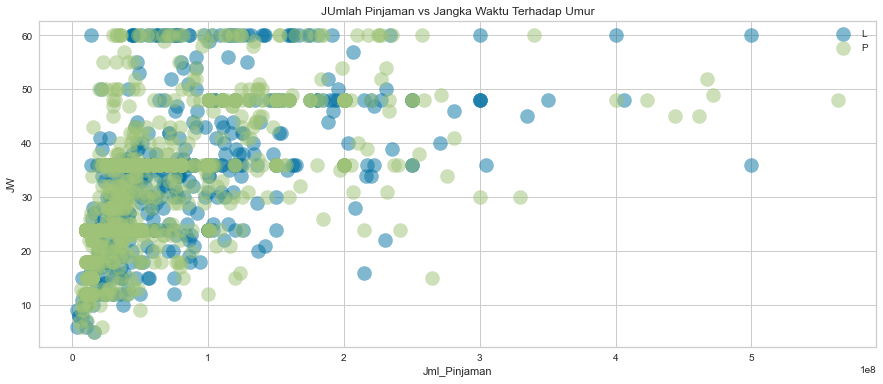

In [20]:
plt.figure(1 , figsize = (15 , 6))
for jeniskel in ['L' , 'P']:
    plt.scatter(x = 'Jml_Pinjaman',y = 'JW' ,
                data = df[df['Jenis_Kel'] == jeniskel] ,s = 200 , alpha = 0.5 , label = jeniskel)
plt.xlabel('Jml_Pinjaman'), plt.ylabel('JW') 
plt.title('JUmlah Pinjaman vs Jangka Waktu Terhadap Umur')
plt.legend()
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, normalize

In [27]:
#Kelompokan Variabel Numerik dan Kategori

numerical_index = (df.dtypes != 'object')
numerical_features = list(numerical_index[numerical_index].index)
categorical_index = (df.dtypes == 'object')
categorical_features = list(categorical_index[categorical_index].index)

#Standarisasi Variabel Numerik

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#encode Variabel Kategori

encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

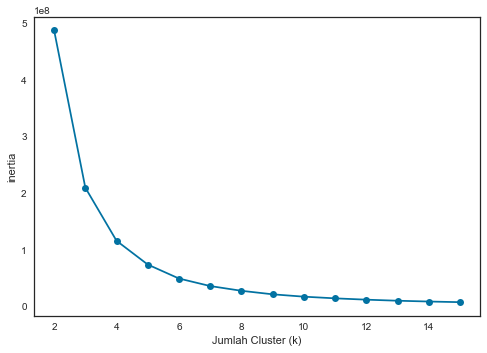

In [28]:
# Kalkulasi sum of squared distance dalm bentuk Elbow Method

ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(var_list_1)
    
    ssd.append(kmeans1.inertia_)

In [29]:
##Umur Terhadapat Jumlah Pinjaman

km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Umur','Jml_Pinjaman']])
y_predicted

array([2, 1, 1, ..., 1, 0, 1])

In [30]:
# Menampilkan Centroid

km.cluster_centers_

array([[0.72269527, 0.06747046],
       [0.23612396, 0.05953246],
       [0.47775487, 0.0507326 ],
       [0.52184517, 0.35624913]])

In [32]:
df['cluster']=y_predicted

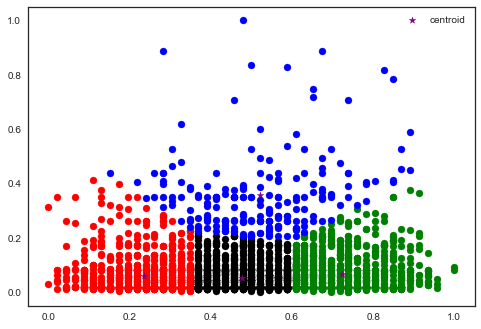

In [34]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Umur,df1['Jml_Pinjaman'],color='green')
plt.scatter(df2.Umur,df2['Jml_Pinjaman'],color='red')
plt.scatter(df3.Umur,df3['Jml_Pinjaman'],color='black')
plt.scatter(df4.Umur,df4['Jml_Pinjaman'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

### Kesimpulan 

Cluster 0 (Green) – Rata-rata jumlah kredit rendah ke menengah, Nasabah Usia Lanjut.

Cluster 1 (Red) – Rata-rata jumlah kredit rendah ke menengah, Nasabah Usia Muda.

Cluster 2 (Black) - Rata-rata jumlah kredit rendah, Nasabah Usia Muda.

Cluster 3 (Blue) - Rata-rata jumlah kredit menengah ke tinggi, Nasabah Usia Menengah ke Lanjut. 

#### Terima Kasih